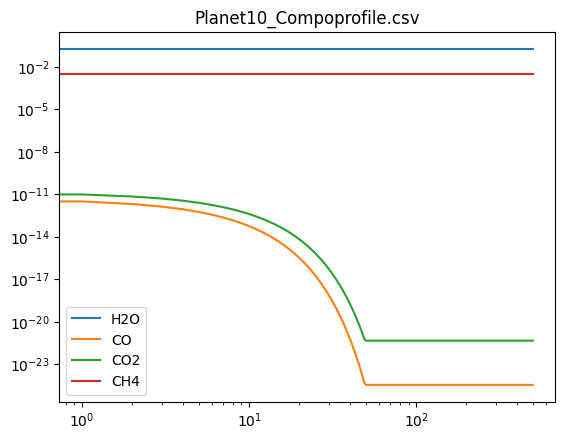

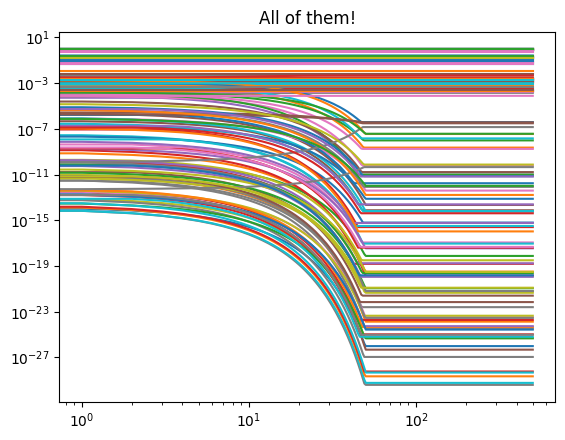

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


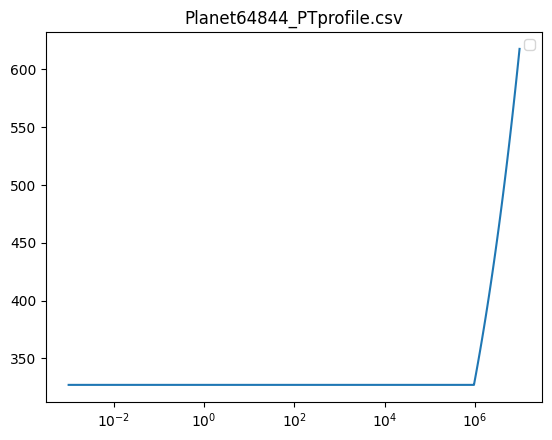

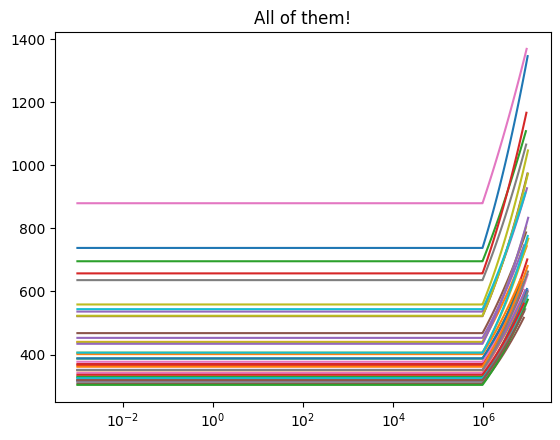

In [1]:
import numpy as np
import os 
import matplotlib.pyplot as plt

directory = "/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/week 3/20250314_CompoProfile"
files = [os.path.join(directory, name) for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name)) and ".csv" in name] 

mols = ["H2", "H2O", "CO", "CO2", "CH4", "He"]

file_ = [f for f in files if "Planet10_" in f][0]
# print(idx)

# file_ = files[0]
data = np.loadtxt(file_, skiprows=3, delimiter=',').T
fname = file_.split("/")[-1]
plt.title(fname)
for m,p in zip(mols[1:-1], data[1:-1]):
    plt.plot(p, label=m)
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()
    
    
for file_ in files:
    data = np.loadtxt(file_, skiprows=3, delimiter=',').T
    plt.title("All of them!")
    for m,p in zip(mols[1:-1], data[1:-1]):
        plt.plot(p, label=m)
plt.xscale("log")
plt.yscale("log")

plt.show()

directory = "/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/week 3/20250314_PTprofile"
files = [os.path.join(directory, name) for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name)) and ".csv" in name]

for file_ in files[:1]:
    data = np.loadtxt(file_, skiprows=2, delimiter=',').T
    fname = file_.split("/")[-1]
    plt.title(fname)
    plt.plot(data[0], data[1])
    plt.xscale("log")
    # plt.yscale("log")
    plt.legend()
    plt.show()
    
    
for file_ in files:
    data = np.loadtxt(file_, skiprows=3, delimiter=',').T
    plt.title("All of them!")
    plt.plot(data[0], data[1])
plt.xscale("log")
# plt.yscale("log")

plt.show()

In [2]:
from astropy.io import ascii
from astropy.table import Table

# Load the target list
targetlist = ascii.read('20250314_ChanoulSeo_FourScenarioPlanets_MetaData.csv')

print(targetlist.keys())

# Initialize the output table with the same columns as the target list
out_targetlist = targetlist



['Star Name', 'Star Mass [Ms]', 'Star Temperature [K]', 'Star Radius [Rs]', 'Star Distance [pc]', 'Star K Mag', 'Star V Mag', 'Star Metallicity', 'Star Age [Gyr]', 'Star RA', 'Star Dec', 'Planet Name', 'Planet Period [days]', 'Planet Temperature [K]', 'Planet Semi-major Axis [m]', 'Planet Radius [Re]', 'Planet Albedo', 'Planet Mass [Me]', 'Molecular Weight', 'Transit Duration [s]', 'Impact Parameter', 'Heat Redistribution Factor', 'Inclination', 'Eccentricity', 'Transit Mid Time', 'Tier', 'Best Method', 'Time [s]', 'Chemistry filename', 'Temperature filename', 'COratio', 'OHratio', 'HeHratio', 'IceoverFe', 'Redox [Oxidized = 0, Reduced = 1]', 'Migration Efficiency [ Inefficient = 0, Efficient = 1]']


In [3]:
from tqdm import tqdm 

comp_folder = "/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/week 3/20250314_CompoProfile"
pt_folder = "/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/week 3/20250314_PTprofile"

for col in ["H2_profile", "He_profile", "H2O_profile", "CO_profile", "CO2_profile", "CH4_profile", "T_profile"]:
    if col not in out_targetlist.colnames:
        out_targetlist[col] = np.nan  # In

print(out_targetlist.colnames)

def find_file(path, keyword):
    file_list = os.listdir(path)
    # print(file_list)
    # print(planet_data['Planet Name'].split("_")[0])

    matching_files = [file for file in file_list if keyword + "_" in file]
    # print(matching_files)
    return matching_files

for i, planet_data in tqdm(enumerate(out_targetlist), total=len(out_targetlist)):

    planet_dict = {col: planet_data[col] for col in out_targetlist.colnames}

    matching_files =find_file(comp_folder, planet_data['Planet Name'].split("_")[0])
    fname = os.path.join(comp_folder, matching_files[0])
    print(out_targetlist["Planet Name"][i], fname.split("/")[-1])
        
    data = ascii.read(fname, format='no_header', comment="#", delimiter=',')

    column_map = ["H2", "H2O", "CO", "CO2", "CH4", "He"]
    data.rename_columns(data.colnames, column_map)
    for column in column_map:
        planet_dict[f"{column}_profile"] = np.median(data[column])    
    
    matching_files =find_file(pt_folder, planet_data['Planet Name'].split("_")[0])
    fname = os.path.join(pt_folder, matching_files[0])

    data = ascii.read(fname, format='no_header', comment="#", delimiter=',')
    planet_dict[f"T_profile"] = np.median(data["col2"])

    # Ensure the row update follows the correct column order
    out_targetlist[i] = [planet_dict[col] for col in out_targetlist.colnames]

print(out_targetlist)


['Star Name', 'Star Mass [Ms]', 'Star Temperature [K]', 'Star Radius [Rs]', 'Star Distance [pc]', 'Star K Mag', 'Star V Mag', 'Star Metallicity', 'Star Age [Gyr]', 'Star RA', 'Star Dec', 'Planet Name', 'Planet Period [days]', 'Planet Temperature [K]', 'Planet Semi-major Axis [m]', 'Planet Radius [Re]', 'Planet Albedo', 'Planet Mass [Me]', 'Molecular Weight', 'Transit Duration [s]', 'Impact Parameter', 'Heat Redistribution Factor', 'Inclination', 'Eccentricity', 'Transit Mid Time', 'Tier', 'Best Method', 'Time [s]', 'Chemistry filename', 'Temperature filename', 'COratio', 'OHratio', 'HeHratio', 'IceoverFe', 'Redox [Oxidized = 0, Reduced = 1]', 'Migration Efficiency [ Inefficient = 0, Efficient = 1]', 'H2_profile', 'He_profile', 'H2O_profile', 'CO_profile', 'CO2_profile', 'CH4_profile', 'T_profile']


 70%|███████   | 28/40 [00:00<00:00, 272.94it/s]

Planet2116 Planet2116_Compoprofile.csv
Planet4458 Planet4458_Compoprofile.csv
Planet1469 Planet1469_Compoprofile.csv
Planet20081 Planet20081_Compoprofile.csv
Planet16362 Planet16362_Compoprofile.csv
Planet16519 Planet16519_Compoprofile.csv
Planet19196 Planet19196_Compoprofile.csv
Planet11276 Planet11276_Compoprofile.csv
Planet9906 Planet9906_Compoprofile.csv
Planet2345 Planet2345_Compoprofile.csv
Planet414788 Planet414788_Compoprofile.csv
Planet239469 Planet239469_Compoprofile.csv
Planet12188 Planet12188_Compoprofile.csv
Planet416612 Planet416612_Compoprofile.csv
Planet389005 Planet389005_Compoprofile.csv
Planet18 Planet18_Compoprofile.csv
Planet394093 Planet394093_Compoprofile.csv
Planet209769 Planet209769_Compoprofile.csv
Planet1283 Planet1283_Compoprofile.csv
Planet167068 Planet167068_Compoprofile.csv
Planet146072 Planet146072_Compoprofile.csv
Planet105702 Planet105702_Compoprofile.csv
Planet100307 Planet100307_Compoprofile.csv
Planet21984 Planet21984_Compoprofile.csv
Planet164267 P

100%|██████████| 40/40 [00:00<00:00, 275.79it/s]

Star Name Star Mass [Ms] ...      CH4_profile           T_profile     
--------- -------------- ... ---------------------- ------------------
    Star1            1.0 ...  0.0009802604486706546   551.946743540478
    Star2            1.0 ...   0.002827612076911294            636.074
    Star3            1.0 ...  0.0021150401615266726            544.033
    Star4            1.0 ...   0.004915492464722232  667.9518775879137
    Star5            1.0 ... 4.4703285147225994e-11  908.8246414772013
    Star6            1.0 ...  0.0001974748755267634            318.095
    Star7            1.0 ... 0.00020533723967613014            468.021
    Star8            1.0 ... 0.00029892992172977386            351.471
    Star9            1.0 ... 0.00021630630869472434            330.222
   Star10            1.0 ...  1.421233736105667e-07            695.895
      ...            ... ...                    ...                ...
   Star30            0.3 ... 0.00025549116026924384            319.247
   Sta

In [4]:
# Add the current notebook's directory to the Python path
import sys
sys.path.append(os.getcwd())

# Now import the function
from mol_to_ratios import calculate_ratios_with_uncertainties

# Ensure the required columns exist in out_targetlist
for col in ["O/H_profile", "C/O_profile", "He/H_profile", "He_profile", "H2_profile", "H_profile", "C_profile", "O_profile"]:
    if col not in out_targetlist.colnames:
        out_targetlist[col] = np.nan  # Initialize missing columns

# Iterate through each planet in the target list
for i, planet_data in tqdm(enumerate(out_targetlist), total=len(out_targetlist)):
    # Convert Row to a dictionary for easier modification
    planet_dict = {col: planet_data[col] for col in out_targetlist.colnames}

    # Retrieve molecular fractions and uncertainties from planet_dict
    H2O = planet_dict.get("H2O_profile", np.nan)
    CO = planet_dict.get("CO_profile", np.nan)
    CO2 = planet_dict.get("CO2_profile", np.nan)
    CH4 = planet_dict.get("CH4_profile", np.nan)
    H2_He = 1e-100
    
    ratios = calculate_ratios_with_uncertainties(H2_He, H2O, CO, CO2, CH4)

    # Add computed ratios to the planet dictionary
    planet_dict["O/H_profile"] = ratios["O/H"]
    planet_dict["C/O_profile"] = ratios["C/O"]
    planet_dict["He/H_profile"] = ratios["He/H"]
    planet_dict["He_profile"] = ratios["He"]
    planet_dict["H2_profile"] = ratios["H2"]
    planet_dict["H_profile"] = ratios["H"]
    planet_dict["C_profile"] = ratios["C"]
    planet_dict["O_profile"] = ratios["O"]
    out_targetlist[i] = [planet_dict[col] for col in out_targetlist.colnames]

100%|██████████| 40/40 [00:00<00:00, 3351.15it/s]


/tmp/ipykernel_534447/421610460.py:3: RuntimeWarning: divide by zero encountered in divide
  plt.scatter(np.arange(len(out_targetlist)), out_targetlist["He/H_profile"]/out_targetlist["HeHratio"], label="He/H")


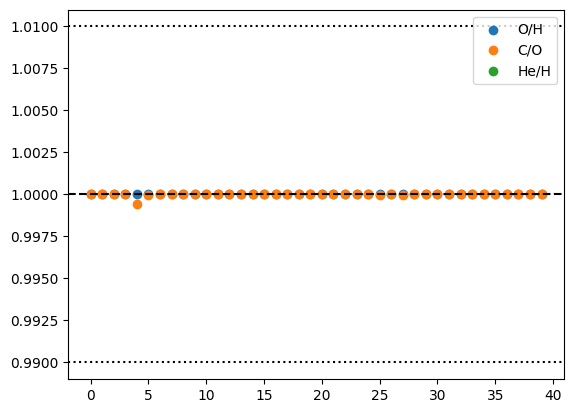

In [5]:
plt.scatter(np.arange(len(out_targetlist)), out_targetlist["O/H_profile"]/out_targetlist["OHratio"], label="O/H")
plt.scatter(np.arange(len(out_targetlist)), out_targetlist["C/O_profile"]/out_targetlist["COratio"], label="C/O")
plt.scatter(np.arange(len(out_targetlist)), out_targetlist["He/H_profile"]/out_targetlist["HeHratio"], label="He/H")
plt.axhline(1, color='k', linestyle='--')
plt.axhline(1.01, color='k', linestyle=':')
plt.axhline(0.99, color='k', linestyle=':')
plt.legend()

# idx = np.where(out_targetlist["O/H_profile"]/out_targetlist["OHratio"]>2)
# print(idx)
# print(out_targetlist["Planet Name"][31])
# print(out_targetlist["Planet Name","O/H_profile", "OHratio"][31])
# print(out_targetlist["Planet Name"][out_targetlist["O/H_profile"]/out_targetlist["OHratio"]>2])